DAVIDSON ALVES SANTOS DE SANTANA

dass@cesar.school

# Regressão Linear com NumPy

## Objetivos deste experimento

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se programação totalmente NumPy com:
- o **cálculo do gradiente**,
- a **função de perda** e
- a atualização dos parâmetros são feitos de forma explícita.
- A rede é criada com uma camada como uma classe

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinear_Otimizacao.png)

## Importação dos pacotes

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt   # para plotting

from sklearn.datasets import load_iris  # para carregar dataset

import numpy as np  # processamento matricial

np.random.seed(1234)

## Dataset

### Leitura dos dados

In [ ]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1]
y_train = data[:,1:2]

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float64
y_train.shape: (50, 1) float64
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [ ]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()

Text(0, 0.5, 'Comprimento petalas')

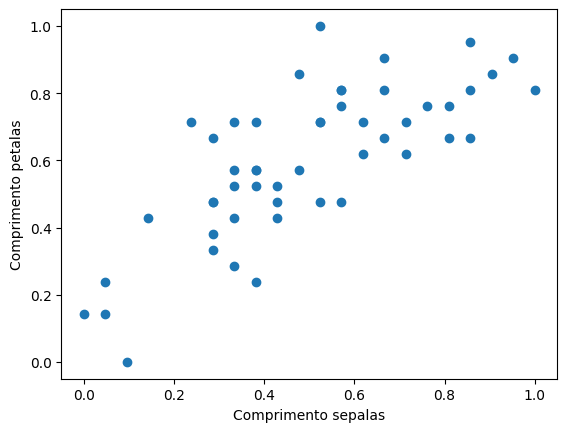

In [ ]:
plt.scatter(x_train,y_train)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')

## Modelo da rede

### Reta de ajuste

A equação da reta no plano necessita de dois parâmetros, aqui denominados $w_0$ (*bias*) e inclinação $w_1$. Veja figura:

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/linhareta.png)

A reta de ajuste será dada por:

$$ \hat{y} = w_0 + w_1 x $$

onde
* $w_1$ é o coeficiente angular da reta e
* $w_0$ é a interseção do eixo vertical quando x é igual a zero, também denominado de *bias*.
* $x$ é a variável de entrada (comprimento das sépalas) e
* $\hat{y}$ é a predição (comprimento estimado das pétalas).

### Linear Regression Model

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinearNeuronio.png)

### Formulação matricial do neurônio

* $\mathbf{w} = [w_0 \ w_1]$ é vetor linha de parâmetros e
* $\mathbf{x} = [1 \ x_0] $ é vetor linha de uma amostra (com *bias*).

$$ \hat{y} = 1 w_0 + x_0 w_1 $$

$$ [\hat{y}] = [1 \ x_0] \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} $$

$$ \mathbf{\hat{y}} = \mathbf{x} \mathbf{w^T} $$

### Fazendo o predict de várias amostras

$$ \begin{matrix}
\begin{bmatrix}
\hat{y}_0\\
\hat{y}_1\\
\\
\hat{y}_{M-1}
\end{bmatrix} &=& \begin{bmatrix}
1 & x_0 \\
1 & x_1\\
\\
1 & x_{M-1} \\
\end{bmatrix}
&
\begin{bmatrix}
w_0\\
w_1
\end{bmatrix} \\
(M,1) & & (M,2) & (2,1) \\
\end{matrix} $$

### Preenchendo x com coluna de 1's para bias

In [ ]:
x_train

array([[1.        ],
       [0.71428571],
       [0.95238095],
       [0.28571429],
       [0.76190476],
       [0.38095238],
       [0.66666667],
       [0.        ],
       [0.80952381],
       [0.14285714],
       [0.04761905],
       [0.47619048],
       [0.52380952],
       [0.57142857],
       [0.33333333],
       [0.85714286],
       [0.33333333],
       [0.42857143],
       [0.61904762],
       [0.33333333],
       [0.47619048],
       [0.57142857],
       [0.66666667],
       [0.57142857],
       [0.71428571],
       [0.80952381],
       [0.9047619 ],
       [0.85714286],
       [0.52380952],
       [0.38095238],
       [0.28571429],
       [0.28571429],
       [0.42857143],
       [0.52380952],
       [0.23809524],
       [0.52380952],
       [0.85714286],
       [0.66666667],
       [0.33333333],
       [0.28571429],
       [0.28571429],
       [0.57142857],
       [0.42857143],
       [0.04761905],
       [0.33333333],
       [0.38095238],
       [0.38095238],
       [0.619

In [ ]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [ ]:
x_train_bias

array([[1.        , 1.        ],
       [1.        , 0.71428571],
       [1.        , 0.95238095],
       [1.        , 0.28571429],
       [1.        , 0.76190476],
       [1.        , 0.38095238],
       [1.        , 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.80952381],
       [1.        , 0.14285714],
       [1.        , 0.04761905],
       [1.        , 0.47619048],
       [1.        , 0.52380952],
       [1.        , 0.57142857],
       [1.        , 0.33333333],
       [1.        , 0.85714286],
       [1.        , 0.33333333],
       [1.        , 0.42857143],
       [1.        , 0.61904762],
       [1.        , 0.33333333],
       [1.        , 0.47619048],
       [1.        , 0.57142857],
       [1.        , 0.66666667],
       [1.        , 0.57142857],
       [1.        , 0.71428571],
       [1.        , 0.80952381],
       [1.        , 0.9047619 ],
       [1.        , 0.85714286],
       [1.        , 0.52380952],
       [1.        , 0.38095238],
       [1.

### Classe com o modelo da rede

In [ ]:
class Net():
    def __init__(self, n_in, n_out):
        self.w = np.random.uniform(-0.1,0.1,(n_out,n_in)) #inicialização dos parâmetros

    def forward(self, x_bias):
        return x_bias.dot(self.w.T)

### Criando a rede, instanciando o objeto model

In [ ]:
model = Net(2,1) # duas entradas (1 + x0) e uma saída y_pred

In [ ]:
model.w

array([[-0.06169611,  0.02442175]])

In [ ]:
model.forward(x_train_bias)

array([[-0.03727436],
       [-0.044252  ],
       [-0.0384373 ],
       [-0.05471847],
       [-0.04308906],
       [-0.05239258],
       [-0.04541494],
       [-0.06169611],
       [-0.04192612],
       [-0.05820729],
       [-0.06053317],
       [-0.0500667 ],
       [-0.04890376],
       [-0.04774082],
       [-0.05355553],
       [-0.04076318],
       [-0.05355553],
       [-0.05122964],
       [-0.04657788],
       [-0.05355553],
       [-0.0500667 ],
       [-0.04774082],
       [-0.04541494],
       [-0.04774082],
       [-0.044252  ],
       [-0.04192612],
       [-0.03960024],
       [-0.04076318],
       [-0.04890376],
       [-0.05239258],
       [-0.05471847],
       [-0.05471847],
       [-0.05122964],
       [-0.04890376],
       [-0.05588141],
       [-0.04890376],
       [-0.04076318],
       [-0.04541494],
       [-0.05355553],
       [-0.05471847],
       [-0.05471847],
       [-0.04774082],
       [-0.05122964],
       [-0.06053317],
       [-0.05355553],
       [-0

### Testando o predict da rede (mesmo sem treiná-la)

In [ ]:
xin = np.random.randn(4,2) # 4 amostras, 2 entradas (1 + x0)
ypred = model.forward(xin)
ypred

array([[-0.09602795],
       [ 0.0661236 ],
       [-0.06857828],
       [-0.05573871]])

## Treinamento via gradiente descendente

Função de perda:
$$ J(\hat{y_i},y_i) = \frac{1}{M} \sum_{i=0}^{M-1} (\hat{y_i} - y_i)^2 $$

Gradiente:
$$  \mathbf{\nabla{J_w}} = \frac{2}{M}\mathbf{x^T}(\mathbf{x w^T} - \mathbf{y}) $$

Atualização dos parâmetros pelo gradiente descendente:
$$ \mathbf{w} = \mathbf{w} − \eta (\mathbf{\nabla J_w})^T $$

### Laço de treinamento

In [ ]:
num_epochs = 100
learning_rate = 0.5
for epoch in range(num_epochs):

    # forward - predict
    y_pred = model.forward(x_train_bias)

    #loss cálculo da função de perda
    loss = np.square(y_pred - y_train).mean()
    print(loss)

    # cálculo do gradiente pelas derivadas parciais
    w_grad = (2.0/n_samples) * (x_train_bias.T).dot(x_train_bias.dot(model.w.T) - y_train)
    print(w_grad)

    # gradiente descendente
    print(model.w)
    model.w = model.w - learning_rate * w_grad.T
    print(model.w)

    # verbose
    if (epoch+1) % 1 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))

0.46916299392848965
[[-1.29929609]
 [-0.71938216]]
[[-0.06169611  0.02442175]]
[[0.58795193 0.38411284]]
Epoch[1/100], loss: 0.469163
0.05806978503728478
[[0.3548952 ]
 [0.13927818]]
[[0.58795193 0.38411284]]
[[0.41050433 0.31447374]]
Epoch[2/100], loss: 0.058070
0.030542871208658035
[[-0.06871057]
 [-0.07794694]]
[[0.41050433 0.31447374]]
[[0.44485962 0.35344721]]
Epoch[3/100], loss: 0.030543
0.028105420739894495
[[ 0.03845382]
 [-0.02046415]]
[[0.44485962 0.35344721]]
[[0.42563271 0.36367929]]
Epoch[4/100], loss: 0.028105
0.027363927019010567
[[ 0.01009565]
 [-0.03324256]]
[[0.42563271 0.36367929]]
[[0.42058488 0.38030057]]
Epoch[5/100], loss: 0.027364
0.026786724330353836
[[ 0.01639966]
 [-0.02816438]]
[[0.42058488 0.38030057]]
[[0.41238505 0.39438276]]
Epoch[6/100], loss: 0.026787
0.026268944171237815
[[ 0.01389443]
 [-0.02773276]]
[[0.41238505 0.39438276]]
[[0.40543784 0.40824913]]
Epoch[7/100], loss: 0.026269
0.025799259233654476
[[ 0.01368149]
 [-0.02619582]]
[[0.40543784 0.4082

## Avaliação

### Predict

In [ ]:
model.w

array([[0.26295353, 0.68335641]])

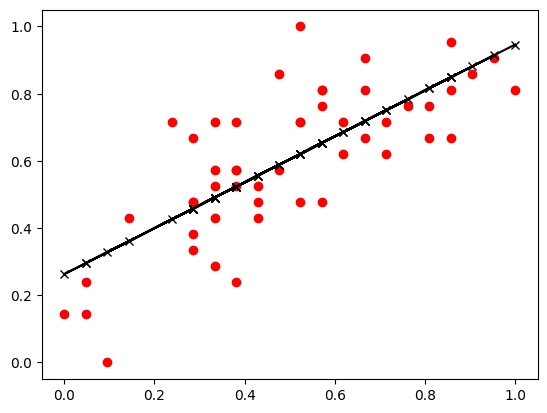

In [ ]:
y_pred = model.forward(x_train_bias)
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, y_pred, 'kx-', label='Fitting Line')

### Parâmetros treinados

In [ ]:
print(model.w)

[[0.26295353 0.68335641]]


### Avaliação do modelo

In [ ]:
loss = np.square(y_pred - y_train).mean()
loss

0.02117000379151052

### Valor ótimo, solução analítica

$$  \mathbf{w} =(\mathbf{x^T} \mathbf{x})^{−1}\mathbf{x^T} \mathbf{y} $$

In [ ]:
x = x_train_bias
y = y_train
w_opt = (np.linalg.inv((x.T).dot(x)).dot(x.T)).dot(y)
print(w_opt.T)

[[0.26134159 0.68646976]]


# Exercícios

## Questões

1. Quantos parâmetros são treinados nesse modelo?
R.: 2, w0 e w1

2. Qual é o número de atributos de entrada para a rede?
R.: 2 (bias + x)

3. Qual é o número de saídas da rede?
R.: 1

4. Suponha que eu tenha agora 5 mil amostras para fazer a predição. Qual é o shape da matriz de entrada?
   Qual é o shape do matriz de saída?

   R.: [5000, 2] ---> entrada
        [5000, 1] ----> saída


## Atividades

1. Modifique o laço do treinamento via gradiente descendente para guardar em uma lista, o valor da perda no final
   de cada época. Após o treinamento, plote o valor da perda em função da época.
2. Calcule o valor da perda (MSE) da rede com os parâmetros inicializados, sem serem treinados.
3. Coloque os valores dos pesos da solução ótima analítica no modelo da rede e calcule o valor da perda (MSE) e
   compare com o valor da perda obtida pelo método da otimização via gradiente descendente.

In [ ]:
# QUESTÃO 1

model = Net(2,1) # instanciar rede

perdas = []
num_epochs = 100
learning_rate = 0.5

for epoch in range(num_epochs):

    # forward - predict
    y_pred = model.forward(x_train_bias)

    #loss cálculo da função de perda
    loss = np.square(y_pred - y_train).mean()
    perdas.append(loss)


    # cálculo do gradiente pelas derivadas parciais
    w_grad = (2.0/n_samples) * (x_train_bias.T).dot(x_train_bias.dot(model.w.T) - y_train)


    # gradiente descendente
    model.w = model.w - learning_rate * w_grad.T


    # verbose
    if (epoch+1) % 1 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))


Epoch[1/100], loss: 0.432375
Epoch[2/100], loss: 0.056651
Epoch[3/100], loss: 0.031341
Epoch[4/100], loss: 0.028966
Epoch[5/100], loss: 0.028154
Epoch[6/100], loss: 0.027505
Epoch[7/100], loss: 0.026921
Epoch[8/100], loss: 0.026391
Epoch[9/100], loss: 0.025910
Epoch[10/100], loss: 0.025474
Epoch[11/100], loss: 0.025077
Epoch[12/100], loss: 0.024717
Epoch[13/100], loss: 0.024391
Epoch[14/100], loss: 0.024094
Epoch[15/100], loss: 0.023825
Epoch[16/100], loss: 0.023580
Epoch[17/100], loss: 0.023358
Epoch[18/100], loss: 0.023157
Epoch[19/100], loss: 0.022974
Epoch[20/100], loss: 0.022807
Epoch[21/100], loss: 0.022657
Epoch[22/100], loss: 0.022520
Epoch[23/100], loss: 0.022395
Epoch[24/100], loss: 0.022282
Epoch[25/100], loss: 0.022180
Epoch[26/100], loss: 0.022087
Epoch[27/100], loss: 0.022002
Epoch[28/100], loss: 0.021926
Epoch[29/100], loss: 0.021856
Epoch[30/100], loss: 0.021793
Epoch[31/100], loss: 0.021735
Epoch[32/100], loss: 0.021683
Epoch[33/100], loss: 0.021636
Epoch[34/100], loss

In [ ]:
perdas

[0.3854640432804148,
 0.05832845935512007,
 0.03575231676891537,
 0.033159635222976526,
 0.03197383167716231,
 0.030973446670430557,
 0.030070167209754944,
 0.029250402501347604,
 0.028506157777577007,
 0.02783045800475593,
 0.027216989028363475,
 0.026660019422300733,
 0.026154345692978826,
 0.02569524358413329,
 0.02527842393514792,
 0.02489999260923265,
 0.02455641411243521,
 0.024244478563294064,
 0.02396127170452678,
 0.023704147676586837,
 0.023470704298725744,
 0.023258760626623957,
 0.02306633657692262,
 0.02289163442829853,
 0.02273302202625603,
 0.022589017534726703,
 0.022458275592018708,
 0.022339574741777658,
 0.022231806021532942,
 0.02213396260221794,
 0.0220451303818713,
 0.021964479445641172,
 0.02189125631230718,
 0.02182477689488356,
 0.021764420109537812,
 0.02170962207311611,
 0.02165987083506602,
 0.021614701594539442,
 0.021573692357991513,
 0.021536459996706753,
 0.02150265666741973,
 0.02147196656259003,
 0.021444102959970866,
 0.021418805543907068,
 0.02139583

In [ ]:
# QUESTÃO 2
model = Net(2,1) # inicialiar rede
model.w

pred = model.forward(x_train_bias)

loss = np.square(y_pred - y_train).mean() # errado, ao invés de y_pred, deve usar a variável pred
loss = np.square(pred - y_train).mean() # --> Correto
loss

0.02117014425438359

In [ ]:
# QUESTÃO 3

# solução ótima
x = x_train_bias
y = y_train
w_opt = (np.linalg.inv((x.T).dot(x)).dot(x.T)).dot(y)
print(w_opt.T)

model.w = w_opt.T

pred = model.forward(x_train_bias)

loss = np.square(pred - y_train).mean()
loss


[[0.26134159 0.68646976]]


0.021169424119097165

In [ ]:
# Epoch[100/100], loss: 0.021171

# Aprendizados